## Page rank Algorithm in action!

In [45]:
import numpy as np
# Let us take an adjacency matrix

A = np.array([[0,0,1,0], 
              [1,0,0,0],
              [0,1,0,0],
              [0,0,1,0]])
print(A)
d = 0.1  # (1-d) is the probability it continues with these transition probabilities
T = 1000   # number of iterations

[[0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


In [65]:
def page_rank(A,d,T):
    P = A.copy()
#     P[:,P.sum(0)==0] = 1   # This identifies if there is a column full of zeros (nodes with no outgoing links) and set the column as 1s
    P = P/(P.sum(0)  + 1e-10)   # normalizing the columns
#     print("P=\n",P)

    # calculating Phat
    Phat = (1-d)*P + d/A.shape[0]*np.ones(A.shape)
    x = np.ones(A.shape[0])/A.shape[0]
#     print("Phat=\n", Phat)

    for _ in range(T):
        x = Phat @ x
        x = x/x.sum()
    print(x)    # looks like Node C is popular


In [66]:

print("page rank with d = 0.1 => ")
page_rank(A,d,T) # page rank with d = 0.1
#[0.24393064 0.25549133 0.2566474  0.24393064] zero replaced with 1
#[0.24378417 0.25560978 0.25682189 0.24378417] zero not replaced

print()
print("trying page_rank with different d values")
for d in np.arange(0.0,1.0,0.1):     
    page_rank(A,d,T)

page rank with d = 0.1 => 
[0.24378417 0.25560978 0.25682189 0.24378417]

trying page_rank with different d values
[0.16666667 0.33333333 0.33333333 0.16666667]
[0.2085826  0.26188688 0.32094793 0.2085826 ]
[0.21126852 0.26356043 0.31390253 0.21126852]
[0.21440478 0.2648299  0.30636055 0.21440478]
[0.21803433 0.26556151 0.29836983 0.21803433]
[0.2221891  0.26560142 0.29002039 0.2221891 ]
[0.22688115 0.26478208 0.28145562 0.22688115]
[0.23209211 0.26293519 0.27288059 0.23209211]
[0.2377625  0.25991196 0.26456303 0.2377625 ]
[0.24378417 0.25560978 0.25682189 0.24378417]


## Creating graphs using networkx

In [73]:
import networkx as nx

G = nx.Graph()  # undirected graph
G = nx.DiGraph() # directed graph


In [76]:

# Add or remove edges
G.add_edges_from([('A','B'), ('B','C'), ('C','A'), ('C', 'D')])
G.remove_edge('A','B')
G.add_edge('A','B')
G.remove_edges_from([('A','B'),('B','C')])
G.add_edges_from([('A','B'), ('B','C')])

In [79]:
# networkx uses dictionary format internally
print(G['A'])

{'B': {}}


In [82]:
# iterate over nodes and edges
for i in G.nodes():
    print(i)
print()
for i,j in G.edges():
    print(i,"->",j)


A
B
C
D

A -> B
B -> C
C -> A
C -> D


In [90]:
# Get and Set node/edge properties

G.node['A']['node_property'] = "node_value"
# G.edge['A']['B']['edge_property'] = "edge_value"
G.nodes(data=True)
G.edges(data=True)

OutEdgeDataView([('A', 'B', {}), ('B', 'C', {}), ('C', 'A', {}), ('C', 'D', {})])

## Drawing and node properties

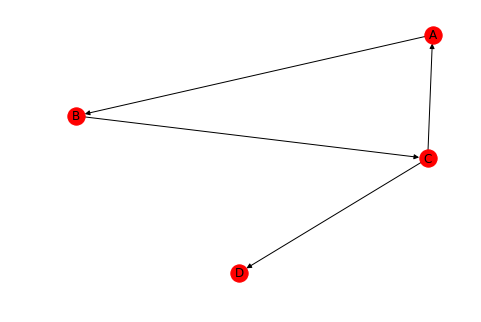

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw(G, with_labels=True)
plt.savefig('mp1_graph.pdf')

## Algorithms

In [97]:
nx.shortest_path_length(G, source='A')  #iterater over path length

nx.pagerank(G, alpha=0.9) #dictionary of node ranks

# requires networkx 2.0
#nx.girvan_newman(G)

{'A': 0.2126075277037968,
 'B': 0.2641838185655828,
 'C': 0.31060112602682377,
 'D': 0.2126075277037968}